### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy as np
import pandas as pd

In [2]:
tas = pd.read_csv("Twitter-Absolute-Sigma-500.data", sep=',',header=None)
tas.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [3]:
headers = pd.Series(["NCD_0","NCD_1","NCD_2","NCD_3","NCD_4","NCD_5","NCD_6","AI_0","AI_1","AI_2","AI_3","AI_4","AI_5","AI_6","AS(NA)_0","AS(NA)_1","AS(NA)_2","AS(NA)_3","AS(NA)_4","AS(NA)_5","AS(NA)_6","BL_0","BL_1","BL_2","BL_3","BL_4","BL_5","BL_6","NAC_0","NAC_1","NAC_2","NAC_3","NAC_4","NAC_5","NAC_6","AS(NAC)_0","AS(NAC)_1","AS(NAC)_2","AS(NAC)_3","AS(NAC)_4","AS(NAC)_5","AS(NAC)_6","CS_0","CS_1","CS_2","CS_3","CS_4","CS_5","CS_6","AT_0","AT_1","AT_2","AT_3","AT_4","AT_5","AT_6","NA_0","NA_1","NA_2","NA_3","NA_4","NA_5","NA_6","ADL_0","ADL_1","ADL_2","ADL_3","ADL_4","ADL_5","ADL_6","NAD_0","NAD_1","NAD_2","NAD_3","NAD_4","NAD_5","NAD_6","BUZZ"])
tas.columns = headers
tas.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [4]:
tas.shape

(140707, 78)

In [5]:
tas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [6]:
twit = pd.read_csv("Twitter.data",sep=",",header=None)
twit.columns = headers
twit.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [7]:
twit.shape

(583250, 78)

In [8]:
twit.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


Used Twitter data set instead of Twitter-Absolute-Sigma because it has a continous variable that is good for regression

In [9]:
twit_samp = twit.sample(1000,random_state=0)
twit_samp.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
81333,0,4,2,0,0,14,3,0,2,1,...,1.000000,1.000000,0,4,2,0,0,14,3,21.5
366913,12,14,12,15,37,36,43,9,8,3,...,1.055556,1.023256,12,14,12,15,37,36,43,37.0
571146,111,123,172,106,198,312,130,63,53,109,...,1.003205,1.000000,111,123,172,107,201,312,130,119.0
189634,23,12,23,20,23,39,33,18,12,19,...,1.025641,1.000000,24,12,23,20,23,39,33,32.5
490742,13,108,35,43,19,63,66,11,81,25,...,1.000000,1.000000,13,108,35,43,19,63,66,38.0


## KNN Regression

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data=twit_samp, columns=twit_samp.columns[:-1])
y = twit_samp.BUZZ

In [11]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train,y_train)
    train_score_array.append(knn.score(X_train,y_train))
    test_score_array.append(knn.score(X_test,y_test))


In [13]:
print("Highest Train Score: ", max(train_score_array))
print("Highest Test Score: ", max(test_score_array), "\tk: ",test_score_array.index(max(test_score_array))+1)

diff = [abs(i-j) for i,j in zip(train_score_array, test_score_array)]
print("k-value where difference is the lowest: ", min(diff), "\tk: ",diff.index(min(diff))+1)

Highest Train Score:  0.9999999988259954
Highest Test Score:  0.9349803958069495 	k:  11
k-value where difference is the lowest:  0.0350761626593552 	k:  4


Text(0,0.5,'MSE')

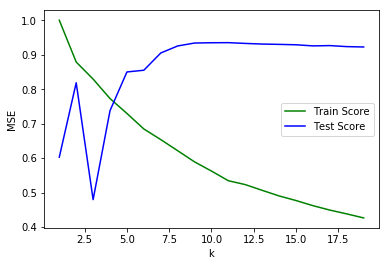

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

## Linear Regression

In [15]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [16]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train,y_train)
print(lreg.score(X_train,y_train))
print(lreg.score(X_test,y_test))

0.9945024632499709
0.8984687050999641


# ASK WHAT THIS IS

Text(0.5,0,'RM')

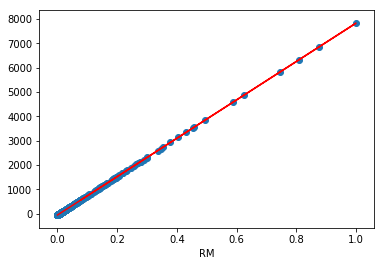

In [17]:
X_train_rm = X_train[:,7].reshape(-1,1)

X_train_rm.shape
lreg.fit(X_train_rm,y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm,y_predict,c='r')
plt.scatter(X_train_rm,y_predict)
plt.xlabel('RM')

## Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_ridge = GridSearchCV(Ridge(),param_grid,cv=5,return_train_score=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [20]:
grid_search_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: 0.85


In [22]:
print("Test set score: {:.2f}".format(grid_search_ridge.score(X_test,y_test)))

Test set score: 0.85


This suggests that the best $\alpha$ parameter is 0.001

## Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

grid_search_lasso = GridSearchCV(Lasso(),param_grid,cv=5,return_train_score=True)

In [24]:
grid_search_lasso.fit(X_train,y_train)

/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))
print("Test set score: {:.2f}".format(grid_search_lasso.score(X_test,y_test)))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.87
Test set score: 0.85


## Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures

train_score_list = []
test_score_list = []

for i in range(1,4):
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly,y_train)
    train_score_list.append(lreg.score(X_train_poly,y_train))
    test_score_list.append(lreg.score(X_test_poly,y_test))

In [27]:
print(train_score_list)
print(test_score_list)

[0.9952815928241572, 0.9999999999999989, 0.9999999999923427]
[0.7996362805461973, -106433.52693198978, -213140747.14281806]


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

param_grid_poly = {'poly': [1,2,3]}
pipe = Pipeline([('poly',PolynomialFeatures()),('lreg',LinearRegression())])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [30]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: -106433.53


<font face="courier new"><p> I am unsure as how to how to proceed.</p>

<p>I know why the test score is so poor. It is because on the train score, poly got the best score when the number of polynomial features was 2 (as can be seen from the above train_score_list). However, its corresponding test score is progressively getting worse.</p>

<p>One of 2 things is happening. One, either the sample size is too small, so its getting a poor model. Two, there has to be a way to fit this model better.</p></font>

## LinearSVR

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linear_svr = LinearSVR().fit(X_train, y_train)
print("Coefficient shape: ", linear_svr.coef_)
print("Intercept shape: ", linear_svr.intercept_)

Coefficient shape:  [ 2.08558778e+00 -8.07735949e-01 -4.87484307e-01  1.44375381e+00
  1.59741589e-01 -6.18744776e-01 -2.19996511e-01  1.80717732e-01
 -5.65913578e-01  2.52900448e-02  2.06314314e-01  2.67460299e-01
 -3.51078513e-02 -1.33632554e-01  2.21670781e-04  3.73158253e-04
  2.66649237e-04  4.22682978e-04  4.69105547e-04  2.75564849e-04
  7.26918817e-05 -2.41561582e-01 -1.47240591e-01  5.06392596e-01
 -9.03305776e-02 -2.08955238e-01 -3.04430692e-02 -2.92258415e-01
 -2.45191483e-01 -1.81467218e-01 -2.44960400e-01  2.57327949e-03
  7.51653769e-02  1.54301584e-02  1.83719713e-01  1.47440397e-04
  2.21793633e-04  1.69938481e-04  2.67713013e-04  3.07528976e-04
  1.44262522e-04  3.84595839e-05 -3.09645809e-01  3.49236620e-03
 -6.41537656e-01  3.32848695e-01 -5.04178990e-01  1.41419688e-01
 -1.83590237e-01  2.06695474e-01  3.46715399e-01 -4.47220400e-01
 -2.76165859e-01  1.07438627e+00  6.23453836e-02  5.35910731e-01
  5.18682155e-02  5.64244445e-01 -2.18818475e-02 -1.89199347e-01
 -3.9